In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [78]:
data = pd.read_csv("iot_dataset.csv")
data.head(5)

,Sl.No,Patient ID,Temperature Data,ECG Data,Pressure Data,Target
0,1,1,32,0,77,1
1,2,2,32,0,77,1
2,3,1,32,16,77,1
3,4,2,32,0,77,1
4,5,1,32,18,77,1


In [79]:
data.shape

(150, 6)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sl.No             150 non-null    int64
 1   Patient ID        150 non-null    int64
 2   Temperature Data  150 non-null    int64
 3   ECG Data          150 non-null    int64
 4   Pressure Data     150 non-null    int64
 5   Target            150 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [81]:
data.isnull().sum()

Sl.No               0
Patient ID          0
Temperature Data    0
ECG Data            0
Pressure Data       0
Target              0
dtype: int64

In [82]:
data.drop(['Sl.No', 'Patient ID'], axis=1, inplace=True)

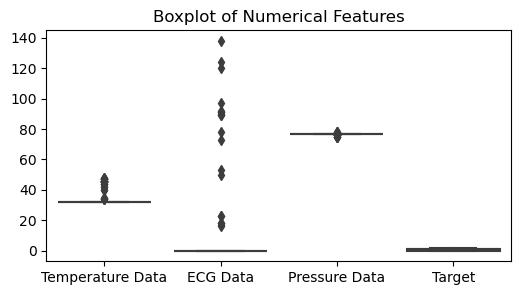

In [87]:
plt.figure(figsize=(6,3))
sns.boxplot(data=data)
plt.title('Boxplot of Numerical Features')
plt.show()

In [88]:
X = data.drop('Target', axis=1)
y = data['Target']

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
data

,Temperature Data,ECG Data,Pressure Data,Target
0,32,0,77,1
1,32,0,77,1
2,32,16,77,1
3,32,0,77,1
4,32,18,77,1
...,...,...,...,...
145,32,0,77,2
146,32,0,77,2
147,32,0,77,1
148,32,0,77,2
